# Chapitre 9 : Analyse de séries chronologiques en finance
Maîtriser les techniques d’analyse de séries temporelles pour les données financières, de l’analyse de tendance de base aux méthodes de prévision avancées.

## Objectifs d’apprentissage :
- Comprendre les composantes des données de séries temporelles (tendance, saisonnalité, bruit)
- Apprendre les techniques de décomposition et d’analyse de séries temporelles
- Appliquer des moyennes mobiles et un lissage exponentiel
- Mettre en œuvre des modèles de prévision de base
- Gérer les données de séries temporelles financières en Python

1. Principes fondamentaux des séries chronologiques
Comprendre les composants et les caractéristiques de base des données de séries chronologiques.

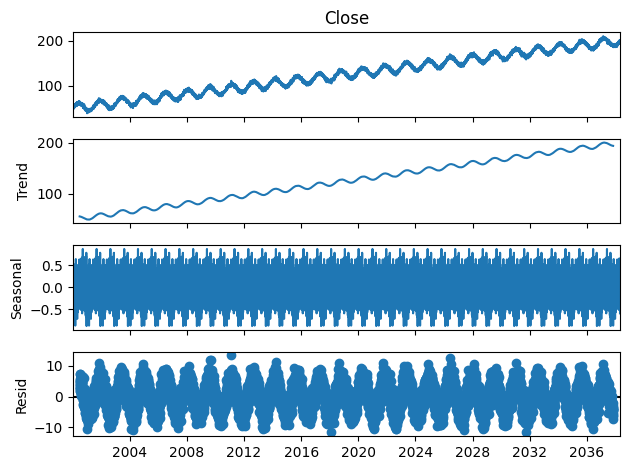

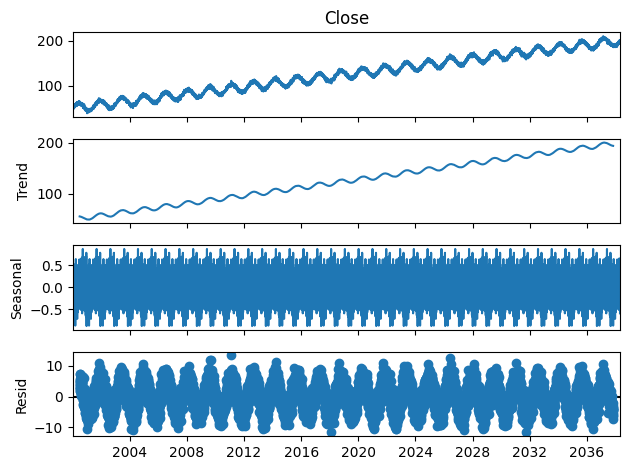

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and process time series data
df = pd.read_csv('stock_data.csv', index_col='Date', parse_dates=True)
result = seasonal_decompose(df['Close'], period=252)  # 252 trading days

# Plot components
result.plot()

2. Moyennes mobiles et analyse technique
Apprenez à calculer et à interpréter les moyennes mobiles pour l’analyse technique.

In [3]:
# Calculate moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_20'] = df['Close'].ewm(span=20).mean()

# Generate trading signals
df['Signal'] = np.where(df['SMA_50'] > df['EMA_20'], 1, -1)

3. Prévision des séries chronologiques
Introduction aux méthodes de prévision à l’aide de modèles statistiques.

c:\Users\wilfr\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


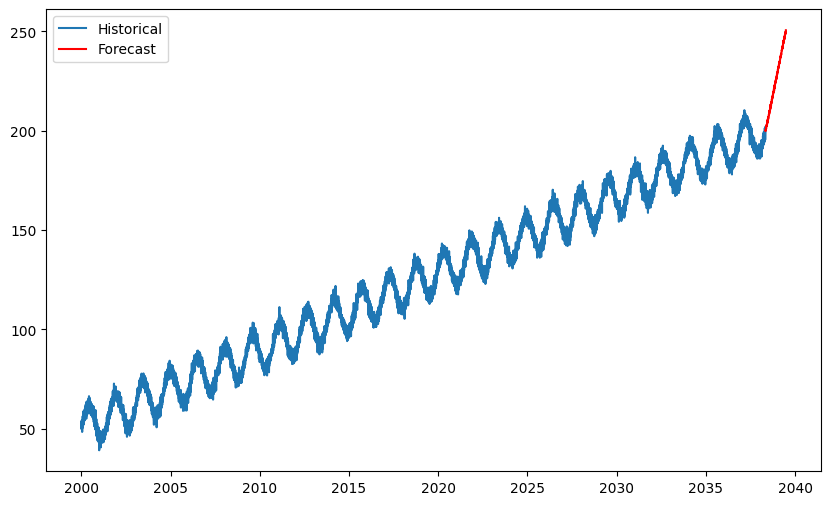

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
model = ExponentialSmoothing(df['Close'],
                           seasonal_periods=252,
                           trend='add',
                           seasonal='add')
fitted_model = model.fit()

# Make predictions
forecast = fitted_model.forecast(300)  # 300-day forecast
import matplotlib.pyplot as plt
# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()